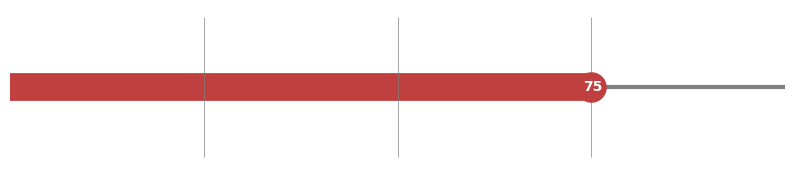

In [86]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Example single percentile value (between 0 and 1)
percentile = 75
percentile = 50

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 2))

# Set a consistent y-coordinate for the lines and the bubble
y_coord = 0.5

cmap = mcolors.LinearSegmentedColormap.from_list('blue_grey_red', ['blue', 'grey', 'red'])

# Normalize the color range from 0 to 100
norm = mcolors.Normalize(vmin=0, vmax=100)

# Get the color for the percentile based on the colormap
color = cmap(norm(percentile))

# Plot a thicker horizontal line from 0 to 100
ax.hlines(y=y_coord, xmin=0, xmax=100, color='grey', linewidth=3)

# Plot an additional line from 0 to the percentile
ax.hlines(y=y_coord, xmin=0, xmax=percentile, color=color, linewidth=20)

# Add percentile value inside the circle
ax.text(percentile + .17, y_coord, f'{percentile}', ha='center', va='center', fontsize=10, color='white', fontweight='bold', zorder = 5)

# Plot the percentile value as a thicker marker on the line
ax.scatter(percentile, y_coord, color=color, s=400, zorder=4, linewidths=2)

for x in [25, 50, 75]:
    ax.vlines(x=x, ymin=0, ymax=1, color='grey', linestyle='-', linewidth=0.5)

# Set the x-axis limits to go from 0 to 1
ax.set_xlim(0, 100)

# Remove all the borders and ticks
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(left=False, bottom=False)

# Remove y-axis labels and ticks since we don't need them
ax.yaxis.set_visible(False)

# Optionally add x-axis labels
ax.set_xlabel('')
ax.set_xticks([])

# Show the plot
plt.show()

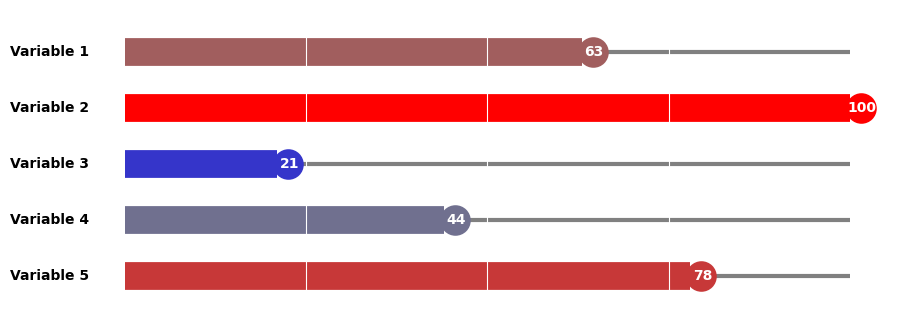

In [108]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Example data with multiple variables and their corresponding percentiles
data = {
    "Variable 1": 63,
    "Variable 2": 100,
    "Variable 3": 21,
    "Variable 4": 44,
    "Variable 5": 78
}

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 4))  # Increase the height to accommodate multiple lines

# Create a colormap that goes from blue to grey to red
cmap = mcolors.LinearSegmentedColormap.from_list('blue_grey_red', ['blue', 'grey', 'red'])

# Normalize the color range from 0 to 100
norm = mcolors.Normalize(vmin=0, vmax=100)

# Calculate the total number of variables to set the y-range correctly
num_variables = len(data)

# Loop through the data, each time decreasing the y-coordinate
for i, (variable, percentile) in enumerate(data.items()):
    y_coord = 0.5 - i * 0.3  # Decrease the y_coord for each line to space them out
    
    # Get the color for the percentile based on the colormap
    color = cmap(norm(percentile))
    
    # Plot a thicker horizontal line from 0 to 100
    ax.hlines(y=y_coord, xmin=0, xmax=100, color='grey', linewidth=3)
    
    # Plot an additional line from 0 to the percentile
    ax.hlines(y=y_coord, xmin=0, xmax=percentile, color=color, linewidth=20)
    
    # Add percentile value inside the circle
    ax.text(percentile + 1.67, y_coord, f'{percentile}', ha='center', va='center', fontsize=10, color='white', fontweight='bold', zorder=5)
    
    # Plot the percentile value as a thicker marker on the line
    ax.scatter(percentile + 1.5, y_coord, color=color, s=400, zorder=4, linewidths=2)
    
    # Add the variable name to the left of the line
    ax.text(-5, y_coord, variable, ha='right', va='center', fontsize=10, color='black', fontweight='bold')

ymin_value = 0.5 - (num_variables - 1) * 0.3 - 0.15  # Adjust the bottom limit to be just below the lowest line
ymax_value = 0.5 + 0.15  # Adjust the top limit to be just above the top line

for x in [25, 50, 75]:
    ax.vlines(x=x, ymin=ymin_value, ymax=ymax_value, color='white', linestyle='-', linewidth=.8)

# Set the x-axis limits to go from 0 to 100
ax.set_xlim(0, 107)

# Remove all the borders and ticks
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(left=False, bottom=False)

# Remove y-axis labels and ticks since we don't need them
ax.yaxis.set_visible(False)

# Remove x-axis labels
ax.set_xticks([])

# Show the plot
plt.show()


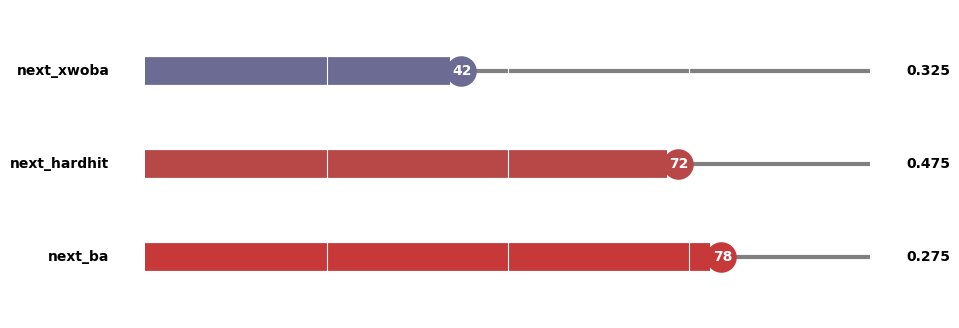

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd

# Example DataFrame structured like your data with Stat, Actual_Percentile, and Actual columns
data = pd.DataFrame({
    'Stat': ['next_xwoba', 'next_hardhit', 'next_xwoba', 'next_hardhit', 'next_ba'],
    'Actual_Percentile': [63, 100, 21, 44, 78],
    'Actual': [0.350, 0.500, 0.300, 0.450, 0.275]
})

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 4))  # Increase the height to accommodate multiple lines

# Create a colormap that goes from blue to grey to red
cmap = mcolors.LinearSegmentedColormap.from_list('blue_grey_red', ['blue', 'grey', 'red'])

# Normalize the color range from 0 to 100
norm = mcolors.Normalize(vmin=0, vmax=100)

# Get the unique stats to iterate over
unique_stats = data['Stat'].unique()

# Calculate the total number of unique stats to set the y-range correctly
num_variables = len(unique_stats)

# Loop through each unique stat and plot its percentile and actual value
for i, stat in enumerate(unique_stats):
    y_coord = 0.5 - i * 0.3  # Decrease the y_coord for each line to space them out
    
    # Filter data for the current stat
    stat_data = data[data['Stat'] == stat]
    
    # For simplicity, take the mean percentile and actual for this stat (if there are multiple rows)
    percentile = stat_data['Actual_Percentile'].mean()
    actual_value = stat_data['Actual'].mean()
    
    # Get the color for the percentile based on the colormap
    color = cmap(norm(percentile))
    
    # Plot a thicker horizontal line from 0 to 100
    ax.hlines(y=y_coord, xmin=0, xmax=100, color='grey', linewidth=3)
    
    # Plot an additional line from 0 to the percentile
    ax.hlines(y=y_coord, xmin=0, xmax=percentile, color=color, linewidth=20)
    
    # Add percentile value inside the circle
    ax.text(percentile + 1.67, y_coord, f'{int(percentile)}', ha='center', va='center', fontsize=10, color='white', fontweight='bold', zorder=5)
    
    # Plot the percentile value as a thicker marker on the line
    ax.scatter(percentile + 1.5, y_coord, color=color, s=400, zorder=4, linewidths=2)
    
    # Add the stat name to the left of the line
    ax.text(-5, y_coord, stat, ha='right', va='center', fontsize=10, color='black', fontweight='bold')
    
    # Add the actual value to the right of the line
    ax.text(105, y_coord, f'{actual_value:.3f}', ha='left', va='center', fontsize=10, color='black', fontweight='bold')

# Adjust y-axis limits to fit the variables properly
ymin_value = 0.5 - (num_variables - 1) * 0.3 - 0.15  # Adjust the bottom limit to be just below the lowest line
ymax_value = 0.5 + 0.15  # Adjust the top limit to be just above the top line

for x in [25, 50, 75]:
    ax.vlines(x=x, ymin=ymin_value, ymax=ymax_value, color='white', linestyle='-', linewidth=.8)

# Set the x-axis limits to go from 0 to 100
ax.set_xlim(0, 107)

# Remove all the borders and ticks
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(left=False, bottom=False)

# Remove y-axis labels and ticks since we don't need them
ax.yaxis.set_visible(False)

# Remove x-axis labels
ax.set_xticks([])

# Show the plot
plt.show()


In [ ]:
data = data[(data['Season'] == selected_act_year) & (data['Name'] == selected_player)]

fig, ax = plt.subplots(figsize=(10, 4))  # Increase the height to accommodate multiple lines

        # Create a colormap that goes from blue to grey to red
cmap = mcolors.LinearSegmentedColormap.from_list('blue_grey_red', ['blue', 'grey', 'red'])

        # Normalize the color range from 0 to 100
norm = mcolors.Normalize(vmin=0, vmax=100)

        # Get the unique stats to iterate over
unique_stats = data['Stat'].unique()

        # Calculate the total number of unique stats to set the y-range correctly
num_variables = len(unique_stats)

        # Loop through each unique stat and plot its percentile and actual value
for i, stat in enumerate(unique_stats):
    y_coord = 0.5 - i * 0.3  # Decrease the y_coord for each line to space them out
            
            # Filter data for the current stat
    stat_data = data[data['Stat'] == stat]
            
            # For simplicity, take the mean percentile and actual for this stat (if there are multiple rows)
    percentile = stat_data['Actual_Percentile'].mean()
    actual_value = stat_data['Actual'].mean()
            
            # Get the color for the percentile based on the colormap
    color = cmap(norm(percentile))
            
            # Plot a thicker horizontal line from 0 to 100
    ax.hlines(y=y_coord, xmin=0, xmax=100, color='grey', linewidth=3)
            
            # Plot an additional line from 0 to the percentile
    ax.hlines(y=y_coord, xmin=0, xmax=percentile, color=color, linewidth=20)
            
            # Add percentile value inside the circle
    ax.text(percentile + 1.67, y_coord, f'{int(percentile)}', ha='center', va='center', fontsize=10, color='white', fontweight='bold', zorder=5)
            
            # Plot the percentile value as a thicker marker on the line
    ax.scatter(percentile + 1.5, y_coord, color=color, s=400, zorder=4, linewidths=2)
            
            # Add the stat name to the left of the line
    ax.text(-5, y_coord, stat, ha='right', va='center', fontsize=10, color='black', fontweight='bold')
            
            # Add the actual value to the right of the line
    ax.text(105, y_coord, f'{actual_value:.3f}', ha='left', va='center', fontsize=10, color='black', fontweight='bold')

        # Adjust y-axis limits to fit the variables properly
ymin_value = 0.5 - (num_variables - 1) * 0.3 - 0.15  # Adjust the bottom limit to be just below the lowest line
ymax_value = 0.5 + 0.15  # Adjust the top limit to be just above the top line

for x in [25, 50, 75]:
    ax.vlines(x=x, ymin=ymin_value, ymax=ymax_value, color='white', linestyle='-', linewidth=.8)

        # Set the x-axis limits to go from 0 to 100
    ax.set_xlim(0, 107)

        # Remove all the borders and ticks
    ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.tick_params(left=False, bottom=False)

        # Remove y-axis labels and ticks since we don't need them
        ax.yaxis.set_visible(False)

        # Remove x-axis labels
        ax.set_xticks([])

        st.pyplot(fig)